<a href="https://colab.research.google.com/github/SamNdirangu/Image-edge-detector-convolution/blob/master/Image_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Edge Detection using Convolution

## Step 1: Import Libraries

In [0]:
import skimage.io

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import math

### Step 2: Import our image

(674, 1199)


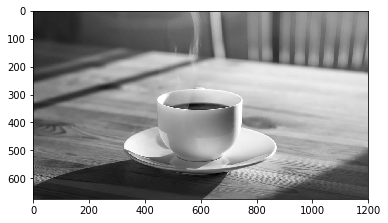

In [5]:
#Using skimage access the image as a black and white
image = skimage.io.imread('img.jpg', as_gray=True) #The image should be in
# the same directory

#Show the uploaded image
plt.imshow(image, cmap = 'gray')
print(image.shape)#print the image shape
(y,x) = image.shape

### Step 3: Step up the convolution filter

In [0]:
tf.reset_default_graph()

# Write the filter weights as a 2d array
#Horizontal filter
edgeFilterH = np.array([3,3]) #Declare our array
edgeFilterH = [ [1,2,1], [0,0,0], [-1,-2,-1] ]

#Vertical filter
edgeFilterV = np.array([3,3]) #Declare our array
edgeFilterV = [ [1,0,1], [2,0,-2], [-1,0,-1] ]


input_placeholder = tf.placeholder(
dtype = tf.float32, shape=(1,image.shape[0], image.shape[1], 1))


with tf.name_scope('convolution'):
    conv_w_h = tf.constant(edgeFilterH, dtype=tf.float32, shape=(3, 3, 1, 1))
    conv_w_v = tf.constant(edgeFilterV, dtype=tf.float32, shape=(3, 3, 1, 1))    
    output_h = tf.nn.conv2d(input=input_placeholder, filter=conv_w_h, strides=[1, 1, 1, 1], padding='SAME')
    output_v = tf.nn.conv2d(input=input_placeholder, filter=conv_w_v, strides=[1, 1, 1, 1], padding='SAME')


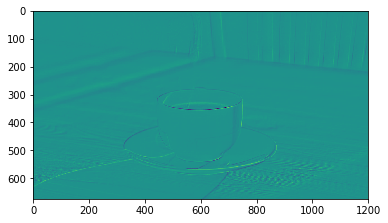

In [8]:
with tf.Session() as sess:
    result_h = sess.run(output_h, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})
    result_v = sess.run(output_v, feed_dict={
            input_placeholder: image[np.newaxis, :, :, np.newaxis]})
    
plt.imshow(result_h[0, :, :, 0]) # view horisontaal edges
plt.imshow(result_v[0, :, :, 0]) # view vertical edges

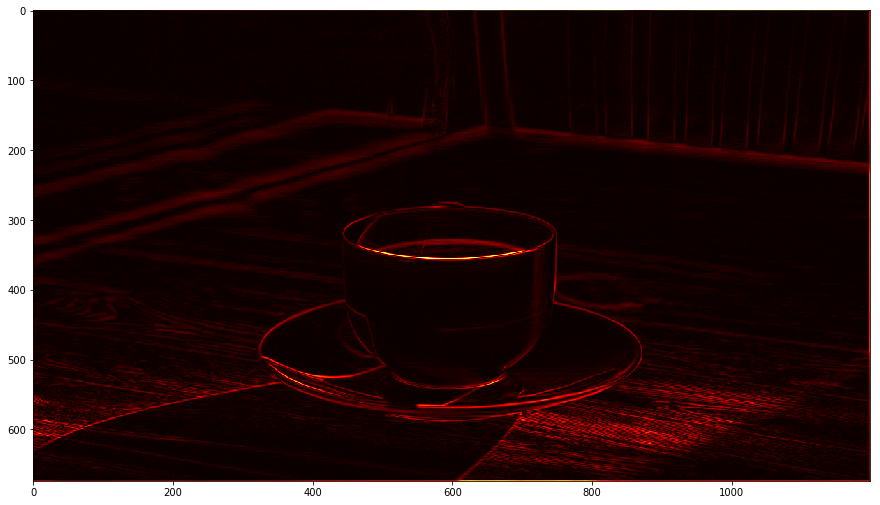

In [9]:
result_lenght = ((result_v**2) + (result_h**2))**0.5  
plt.figure(figsize=(15,15))
plt.imshow(result_lenght[0, :, :, 0], cmap='hot')

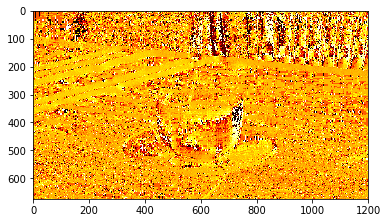

In [10]:

result_angle = (np.arctan(result_v/(result_h+0.00000001)))#*(2*math.pi)
plt.imshow(result_angle[0, :, :, 0], cmap='hot')

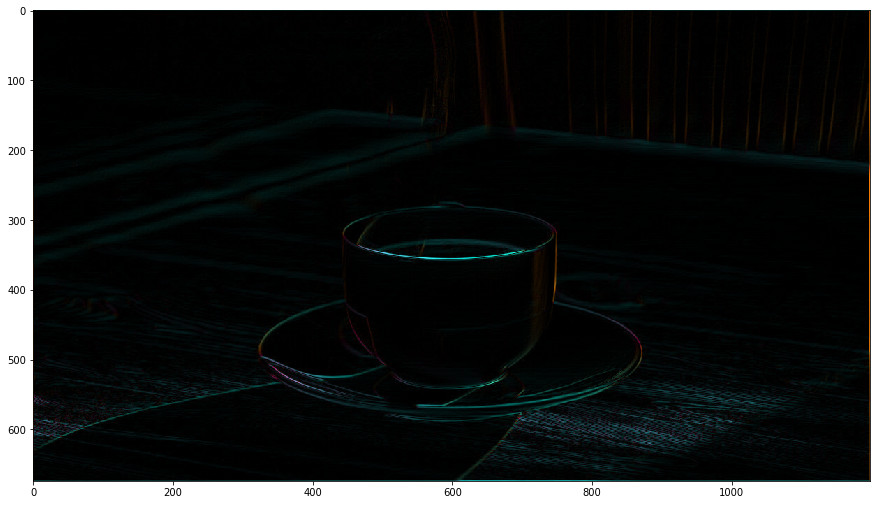

In [11]:
#normalize like crazy
result_lenght_norm = (result_lenght[0,:,:,0] + (np.min(result_lenght)*-1) ) / (np.min(result_lenght)*-1 + np.max(result_lenght))
result_angle_norm = result_angle[0,:,:,0]

result_red = np.absolute(result_lenght_norm * np.cos(result_angle_norm+4.2))
result_green = np.absolute(result_lenght_norm * np.cos(result_angle_norm+2.1))
result_blue = np.absolute(result_lenght_norm * np.cos(result_angle_norm))

result_rgb = np.zeros((y,x,3))
result_rgb[...,0] = (result_red + (np.min(result_red)*-1) ) / (np.min(result_red)*-1 + np.max(result_red)) 
result_rgb[...,1] = (result_green + (np.min(result_green)*-1) ) / (np.min(result_green)*-1 + np.max(result_green)) 
result_rgb[...,2] = (result_blue + (np.min(result_blue)*-1) ) / (np.min(result_blue)*-1 + np.max(result_blue))


#result_rgb
plt.figure(figsize=(15,15))
plt.imshow(result_rgb)